In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns

import matplotlib.pyplot as plt




np.random.seed(0) 

df = pd.read_table('balance.txt', delim_whitespace=True)
df.head()

/Users/jenjen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


## Data Analysis II

Welcome to the Data Analysis II task. In this task we are going to work on how to handle missing data as well as Data Scaling and Normalisation. Data can have missing values for a number of reasons such as observations that were not collected or data corruption. We will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python. 
## Working with missing data
### Take a first look at the data
This should always be the first step during any analysis. Depending on data sources, missing data are identified differently. Pandas identifies missing values as NaN. However, unless the data has been pre-processed to a degree that an analyst will encounter missing values as NaN. Missing values can appear as a question mark (?) or a zero (0) or minus one (-1) or a blank. So it is important to view and understand your data before anything else.

We are going to use the Dataset 'balance.txt'. From the first five observations, we can see there are several missing values. They have been represented as NaN.

How many NaN values can you point out?

Now that we have seen that there are missing values, we need to get a sense of how many missing values exist in the whole data set. We are going to find how many values we have in each column.


In [12]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Balance       0
Income        6
Limit        15
Rating       11
Cards         1
Age          10
Education     6
Gender        8
Student       7
Married       3
dtype: int64

In order to get an even better sense. We need to see what percentage of all the values are missing. If we get a very high percentage we may not be able to use the data.


In [13]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100


1.7727272727272727

Seems like only 1.77% of the values are missing 

### Drop missing values

One option you have is to remove any rows or columns that contain missing values. This strategy is not generally recommended for datasets with important/sensitive data or datasets with a small number of observations. It's usually worth it to take the time to go through your data and really look at all the columns with missing values to really get to understanding your dataset.

If you're sure you want to drop rows with missing values, pandas does have a handy function, dropna() to help you do this. Let's try it out on our data.

In [14]:
# Create a temporary dataset
temp_df = df

# remove all the rows that contain a missing value.

temp_df.dropna().head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian


As you can observe observations 0,1,2,3 have been dropped from the dataframe because they contained Null values. 

The above proceedure removed observations. Now let us look int removing Columns.

In [15]:
# Create a temporary dataset
temp_df = df


# remove all columns with at least one missing value
columns_with_na_dropped = temp_df.dropna(axis=1)
columns_with_na_dropped.head()

,Balance
0,12.2407984760474
1,23.2833339223376
2,22.5304088790893
3,27.652810710665
4,16.8939784904888


Looks like all columns had atleast one missing values excepts the Balance column. This is one of the reasons why droping data for having NaN's may not be a very good solution. We'll explore other options.

### Filling in missing values automatically

We can use the Panda's fillna() function to fill in missing values in a dataframe. One option we have is to specify what we want the NaN values to be replaced with. Here, we can replace all NaN with 0. 

In [16]:
# Create a temporary dataset
temp_df = df

# replace all NA's with 0
temp_df.fillna(0).head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,0.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,0,6645,483.0,3.0,82.0,15.0,Female,0,Yes,Asian
2,22.5304088790893,104.593,7075,0.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,0,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


Another way is to replace the missing values with whatever values that come just before or just after it in the same column. This can be used in datasets where the observations are in some sorted or logical error.

In [17]:
# Create a temporary dataset
temp_df = df

# replace all NA's the value that comes directly after it in the same column, 
# then replace all the reamining na's with 0
temp_df.fillna(method = 'bfill', axis=0).fillna(0).head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,82.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,104.593,6645,483.0,3.0,82.0,15.0,Female,No,Yes,Asian
2,22.5304088790893,104.593,7075,681.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,Male,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


### Other ways of handling missing data

#### Mean, Median and Mode Imputation

Using the measures of central tendency involves substituting the missing values with the mean or median for numerical variables and the mode for categorical variables. This imputation technique works well with when the values are missing completely at random. One disadvantage is that mean imputation reduces variance in the dataset.

#### Imputation with Linear Regression

This is an imputation technique that utilises variables from the observed data to replace the missing values with predicted values from a regression model. Complete observations  are used to generate the regression equation; the equation is then used to predict missing values for incomplete observations. In an iterative process, values for the missing variable are inserted and then all cases are used to predict the dependent variable. These steps are repeated until there is little difference between the predicted values from one step to the next, that is they converge.  The major drawback of using this method is that it reduces variability. Though we have not introduced regression yet, its important to keep this in mind.

#### k-Neareast Neighbor (kNN) Imputation

For k-Nearest Neighbor imputation, the values are obtained by using similarity-based methods that rely on distance metrics (Euclidean distance, Jaccard similarity, Minkowski norm etc). They can be used to predict both discrete and continuous attributes. KNN workes by finding other observations that are almost similar to the observation with the missing value. For example, if the observation is 'Female' and 'Asian' we will find other users similar to her and get the mean or mode of the missing value. The main disadvantage of using kNN imputation is that it becomes time-consuming when analysing large datasets because it searches for similar instances through all the dataset. 


### Scaling and Normalisation

#### Scaling vs. Normalisation: What's the difference?
One of the reasons that it's easy to get confused between scaling and normalisation is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the range of your data while in normalisation you're changing the shape of the distribution of your data. Let's talk a little more in-depth about each of these options.


#### Scaling
This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example. (Don't worry, we'll work with real data in just a second, this is just to help illustrate the point.)




Text(0.5, 1.0, 'Scaled data')

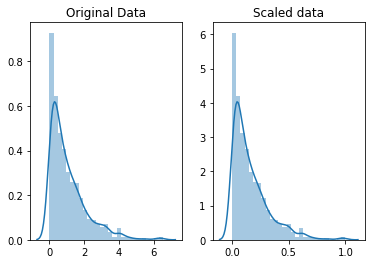

In [18]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Notice that the *shape* of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

## Practice 

In [19]:
# read in all our data
countries = pd.read_csv("countries.csv")

countries.head()


,Country,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,...,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628493,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


Text(0.5, 1.0, 'Scaled data')

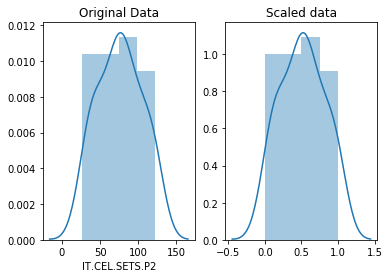

In [20]:
# scale the goals from 0 to 1
scaled_data = minmax_scaling(countries['IT.CEL.SETS.P2'], columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(countries['IT.CEL.SETS.P2'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

You can see that scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most campaigns have small goals but a few have very large ones)

## Normalisation

Scaling just changes the range of your data. Normalisation is a more radical transformation. The point of normalisation is to change your observations so that they can be described as a normal distribution.

> **[Normal distribution:](https://en.wikipedia.org/wiki/Normal_distribution)** Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll only want to normalise your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

Text(0.5, 1.0, 'Normalised data')

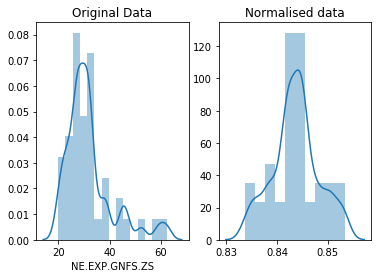

In [21]:

# normalise the pledges (w/ Box-Cox)
positive_pledges = countries['NE.EXP.GNFS.ZS']
normalised_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalised_pledges, ax=ax[1])
ax[1].set_title("Normalised data")

## Compulsory Tasks


In [22]:
# Read in Pakistan.csv and display the first 5 columns




In [23]:
# get the number of missing data points per column


# look at the # of missing points in the first ten columns




Write a note on the reason you think we have missing data on the three top columns : Islamic date, Holiday type and Time. remember  to classify them according to the three categories we analysed in the pdf.





For the following example, decide whether scaling or normalisation makes more sense. 

* You want to build a linear regression model to predict someone's grades given how much time they spend on various activities during a normal school week.  You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying and others study for four or more hours every day. Should you scale or normalise this variable?
* You're still working on your grades study, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you scale or normalise these variables?

In [24]:
# From the countries dataset scale the "EG.ELC.ACCS.ZS" column and visualise it as well




In [25]:
# From the countries dataset normalise the "SP.DYN.CBRT.IN" column

